<a href="https://colab.research.google.com/drive/1VUoUSK0Xc8wbxXDCLhQJQDxB8dvVKHzD?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Air Quality
- Nama: Bagas Shalahuddin Wahid
- Email: bagassw42@gmail.com
- ID Dicoding: bagas_shw

## Import Libraries

In [105]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats

## **1. Data Wrangling**

### **1.1 Gathering Data**

In [106]:
! gdown "1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr"

Downloading...
From: https://drive.google.com/uc?id=1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr
To: /content/Air-quality-dataset.zip
100% 7.96M/7.96M [00:00<00:00, 111MB/s]


In [107]:
!unzip -o "Air-quality-dataset.zip"

Archive:  Air-quality-dataset.zip
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/P

In [108]:
# Data Acquisition
data_folder = "PRSA_Data_20130301-20170228/"
data_frames = {}
for file in os.listdir(data_folder):
    df_label = file.split('.')[0].split('_')[2]
    data_frames[df_label] = pd.read_csv(os.path.join(data_folder, file)).drop(['No'], axis=1)

In [109]:
# Check datatypes
dtype_dict = {}

# Iterate through DataFrames and collect data types
for df_name, df in data_frames.items():
    dtype_dict[df_name] = df.dtypes

pd.DataFrame(dtype_dict).transpose()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
Wanshouxigong,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Tiantan,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Nongzhanguan,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Dongsi,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Shunyi,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Changping,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Huairou,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Dingling,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Guanyuan,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Gucheng,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object


### **1.2 Assessing Data**

In [110]:
# Combine Date Components into a Single Timestamp
def consolidate_datetime(df):
    # Create a new 'datetime' column by combining year, month, day, and hour
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    # Remove the original year, month, day, and hour columns
    return df.drop(columns=['year', 'month', 'day', 'hour'])

# Apply the function to each DataFrame in the collection
for key, frame in data_frames.items():
    data_frames[key] = consolidate_datetime(frame)

In [111]:
# Duplicate Records and Sample Size Analysis
duplicates_count = {}
total_samples = {}

# Iterate over each DataFrame to calculate the number of duplicate rows and total rows
for identifier, df in data_frames.items():
    duplicates_count[identifier] = df.duplicated().sum()  # Calculate duplicates
    total_samples[identifier] = len(df)  # Get total row count

# Transform the duplicate and total sample counts into DataFrames
duplicates_df = pd.DataFrame(list(duplicates_count.items()), columns=['DataFrame', 'Duplicate Count'])
samples_df = pd.DataFrame(list(total_samples.items()), columns=['DataFrame', 'Total Samples'])

# Combine the DataFrames for a comprehensive overview
overview_df = pd.merge(samples_df, duplicates_df, on='DataFrame')
overview_df

,DataFrame,Total Samples,Duplicate Count
0,Wanshouxigong,35064,0
1,Tiantan,35064,0
2,Nongzhanguan,35064,0
3,Dongsi,35064,0
4,Shunyi,35064,0
5,Changping,35064,0
6,Huairou,35064,0
7,Dingling,35064,0
8,Guanyuan,35064,0
9,Gucheng,35064,0


In [112]:
# Null Value Analysis
null_counts = {}

# Loop through each DataFrame to tally and record null values
for key, df in data_frames.items():
    null_counts[key] = df.isnull().sum().sum()  # Total null values in the DataFrame

# Convert the null value tallies into a DataFrame for a more readable format
df_null_counts = pd.DataFrame.from_dict(null_counts, orient='index', columns=['Total Nulls'])
df_null_counts

,Total Nulls
Wanshouxigong,5146
Tiantan,5277
Nongzhanguan,4090
Dongsi,7600
Shunyi,8523
Changping,5166
Huairou,7485
Dingling,7015
Guanyuan,5279
Gucheng,4728


### **1.3 Data Preparation and Cleaning**

In [113]:
# Processing Missing Values in Data
for key, df in data_frames.items():
    # Identify columns with numeric data
    numerical_columns = df.select_dtypes(include=['number']).columns
    # Replace missing numeric values with column median
    df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())
    # Fill missing values in 'wd' column with the previous valid value
    df['wd'] = df['wd'].fillna(method='pad')

In [114]:
# Null Value Analysis
null_counts = {}

# Loop through each DataFrame to tally and record null values
for key, df in data_frames.items():
    null_counts[key] = df.isnull().sum().sum()  # Total null values in the DataFrame

# Convert the null value tallies into a DataFrame for a more readable format
df_null_counts = pd.DataFrame.from_dict(null_counts, orient='index', columns=['Total Nulls'])
df_null_counts

,Total Nulls
Wanshouxigong,0
Tiantan,0
Nongzhanguan,0
Dongsi,0
Shunyi,0
Changping,0
Huairou,0
Dingling,0
Guanyuan,0
Gucheng,0


In [115]:
# Combined DataFrame for Analysis
combined_data = pd.concat(data_frames.values(), ignore_index=True)
combined_data

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong,2013-03-01 00:00:00
1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong,2013-03-01 01:00:00
2,8.0,8.0,8.0,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong,2013-03-01 02:00:00
3,8.0,8.0,3.0,16.0,1000.0,42.0,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong,2013-03-01 03:00:00
4,8.0,8.0,3.0,49.0,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,11.0,27.0,4.0,20.0,300.0,81.0,12.6,1011.9,-14.3,0.0,N,2.0,Wanliu,2017-02-28 19:00:00
420764,15.0,43.0,6.0,55.0,500.0,45.0,9.4,1012.3,-11.9,0.0,WSW,1.0,Wanliu,2017-02-28 20:00:00
420765,13.0,35.0,7.0,48.0,500.0,48.0,8.7,1012.8,-13.7,0.0,N,1.1,Wanliu,2017-02-28 21:00:00
420766,12.0,31.0,5.0,47.0,500.0,50.0,7.8,1012.9,-12.6,0.0,NNE,1.0,Wanliu,2017-02-28 22:00:00


## **2. Exploratory Data Analysis (EDA)**

In [116]:
combined_data.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,79.273026,104.235659,15.642997,50.384959,1212.909829,56.925748,13.539869,1010.746005,2.491120,0.064416,1.729444
std,80.064127,91.123375,21.456742,34.714968,1134.271612,55.830557,11.430772,10.469428,13.787259,0.820626,1.245961
min,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,21.000000,36.000000,3.000000,23.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


* **Enhance the DataFrame by including a new column that reflects the most severe air quality category determined from the six different air quality parameters**

In [117]:
# Setting up air quality levels and corresponding pollutant thresholds
quality_levels = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
thresholds_pm25 = [12, 35.4, 150.4, 250.4, float('inf')]
thresholds_pm10 = [54, 154, 254, 354, 424, float('inf')]
thresholds_so2 = [35, 75, 185, 304, 604, float('inf')]
thresholds_no2 = [53, 100, 360, 649, 1249, float('inf')]
thresholds_co = [4400, 9400, 12400, 15400, 30400, float('inf')]
thresholds_o3 = [54, 70, 85, 105, 200, float('inf')]

# Defining a function to identify the air quality level based on pollutant concentration
def get_quality_level(concentration, thresholds):
    for limit in thresholds:
        if concentration <= limit:
            return thresholds.index(limit)

# Assigning an air quality level to each row in the DataFrame based on the highest pollutant level
combined_data['Air Quality'] = combined_data.apply(lambda row: quality_levels[max(
    get_quality_level(row['PM2.5'], thresholds_pm25),
    get_quality_level(row['PM10'], thresholds_pm10),
    get_quality_level(row['SO2'], thresholds_so2),
    get_quality_level(row['NO2'], thresholds_no2),
    get_quality_level(row['CO'], thresholds_co),
    get_quality_level(row['O3'], thresholds_o3)
)], axis=1)

In [118]:
combined_data.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime,Air Quality
0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong,2013-03-01 00:00:00,Moderate
1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong,2013-03-01 01:00:00,Moderate
2,8.0,8.0,8.0,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong,2013-03-01 02:00:00,Moderate
3,8.0,8.0,3.0,16.0,1000.0,42.0,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong,2013-03-01 03:00:00,Good
4,8.0,8.0,3.0,49.0,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong,2013-03-01 04:00:00,Good


In [119]:
# Data Export
combined_data.to_csv("/content/combined_air_quality_data.csv", index=False)

## **3. Visualization & Explanatory Analysis**

### **3.1 Is there a notable correlation among various pollutants and between pollutants and weather conditions?**

<ipython-input-120-fca47f1714a7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = combined_data.corr(method='pearson')  # Default method is 'pearson'


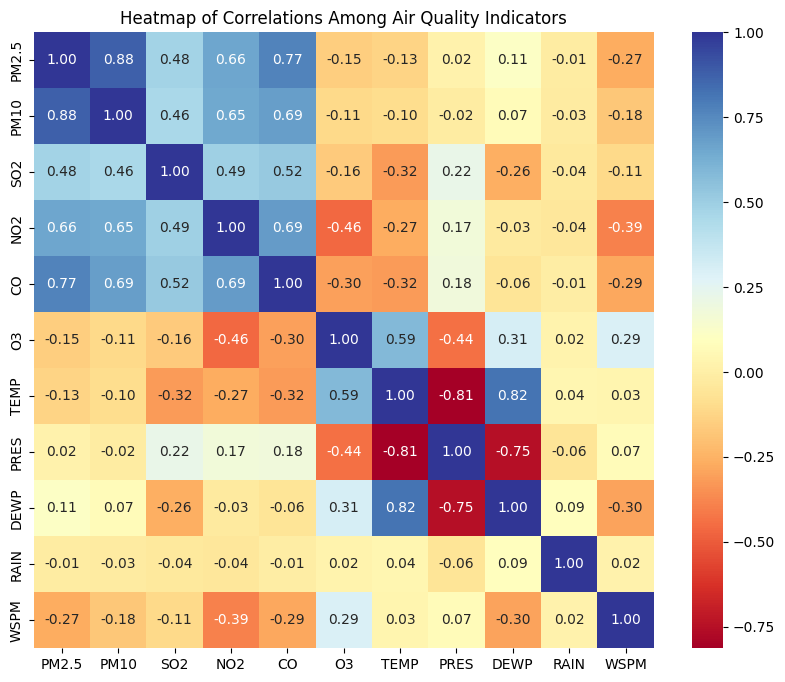

In [120]:
# Generating a Correlation Matrix for Numerical Data
correlation_matrix = combined_data.corr(method='pearson')  # Default method is 'pearson'
# Setting up the plot dimensions and style
plt.figure(figsize=(10, 8))
# Creating a heatmap to visually represent the correlation values
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdYlBu')
plt.title("Heatmap of Correlations Among Air Quality Indicators")
plt.show()

Analisis heatmap diatas menjawab tentang hubungan antara kualitas udara dan parameter cuaca. Ada korelasi kuat antara PM2.5 dan PM10, menunjukkan bahwa mereka sering meningkat atau menurun bersamaan. Tingkat PM2.5 yang tinggi juga dikaitkan dengan konsentrasi SO2, NO2, dan CO yang lebih tinggi, menandakan memburuknya kualitas udara.

Yang menarik, tingkat ozon yang lebih tinggi berkorelasi dengan tingkat polutan lain yang lebih rendah, kemungkinan karena peran ozon dalam reaksi kimia yang mengurangi polusi. Faktor cuaca seperti suhu dan kecepatan angin juga mempengaruhi kualitas udara. Suhu yang lebih tinggi seringkali berkorelasi dengan titik embun yang meningkat, dan kondisi yang lebih hangat mungkin menurunkan tingkat polutan tertentu karena dispersi yang ditingkatkan. Sebaliknya, kecepatan angin yang lebih tinggi membantu menyebarkan polutan, mengakibatkan konsentrasi PM2.5, PM10, SO2, NO2, dan CO yang lebih rendah. Curah hujan menunjukkan dampak minimal pada variabel-variabel ini, menunjukkan pengaruh terbatasnya terhadap kualitas udara dan kondisi cuaca yang diteliti.

Temuan ini menunjukkan bahwa terdapat interaksi antara berbagai faktor lingkungan dan dampak kolektif mereka terhadap kualitas udara.

### **3.2 What is the distribution of air quality index (AQI) categories across different monitoring stations?**

In [121]:
# Creating a Frequency Table for AQI Categories per Monitoring Station
category_frequency_by_station = pd.crosstab(index=combined_data['station'], columns=combined_data['Air Quality'])

# Reordering the columns to match the predefined AQI category sequence
ordered_category_distribution = category_frequency_by_station[quality_levels]
ordered_category_distribution

Air Quality,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,Hazardous
station,,,,,,
Aotizhongxin,1623,6309,14257,5723,5641,1511
Changping,2238,7943,13447,5217,4972,1247
Dingling,1686,7073,13464,6084,5518,1239
Dongsi,1953,6166,13804,5760,6026,1355
Guanyuan,1989,6462,13909,5596,5639,1469
Gucheng,1339,5864,14475,6078,5734,1574
Huairou,2142,7281,14280,5323,4762,1276
Nongzhanguan,1735,6065,13696,5750,6061,1757
Shunyi,2044,6747,14746,5244,4983,1300


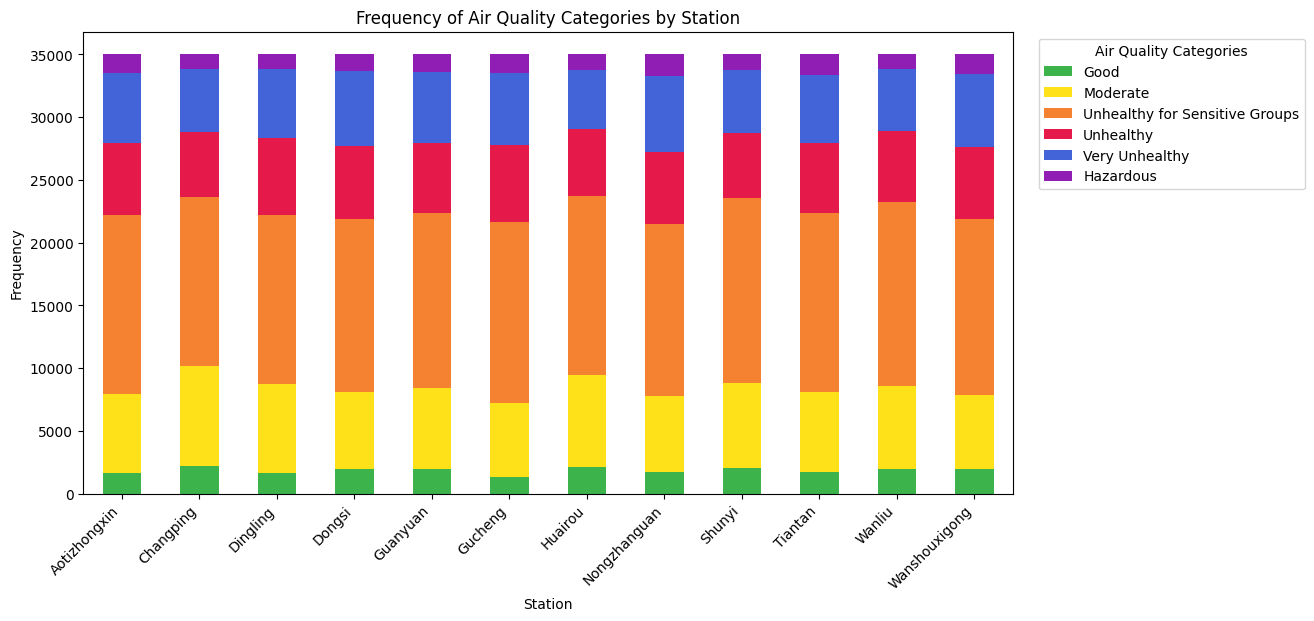

In [122]:
# Setting up custom color scheme for AQI categories
category_colors = ['#3cb44b', '#ffe119', '#f58231', '#e6194B', '#4363d8', '#911eb4']

# Building a stacked bar chart to display AQI category counts at each station
chart = ordered_category_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), color=category_colors)
plt.title('Frequency of Air Quality Categories by Station')
plt.xlabel('Station')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # 'ha' is shorthand for 'horizontalalignment'

# Moving the legend outside of the plot area
plt.legend(title='Air Quality Categories', loc='upper left', bbox_to_anchor=(1.02, 1))

# Showing the plotted chart
plt.show()

Diagram batang yang bertumpuk diatas menampilkan gambaran tentang kategori Indeks Kualitas Udara (AQI) di berbagai stasiun pemantauan, memberikan wawasan tentang tren kualitas udara dan dampak kesehatannya di area tersebut. Stasiun seperti Changping dan Shunyi menonjol karena frekuensi hari dengan kualitas udara "Baik" yang lebih tinggi, dengan jumlah 2238 dan 2044 masing-masing, menunjukkan udara yang lebih bersih dibandingkan dengan stasiun lain. Di sisi lain, Shunyi juga mencatat jumlah hari dengan kualitas udara "Sangat Tidak Sehat" yang signifikan, kekhawatiran yang juga terlihat di Guanyuan, mengindikasikan episode polusi yang parah sesekali.

Stasiun Aotizhongxin dan Dingling mayoritas dicirikan oleh kualitas udara "Sedang", dengan jumlah lebih dari 7000, menunjukkan risiko sedang terhadap kesehatan. Sebaliknya, stasiun Guanyuan, Dongsi, dan Wanliu menunjukkan tingkat yang lebih tinggi dalam kategori "Tidak Sehat" dan "Tidak Sehat untuk Kelompok Sensitif", menandakan risiko kesehatan yang meningkat, khususnya bagi individu dengan kondisi kesehatan yang sudah ada sebelumnya.

Sementara itu, stasiun seperti Nongzhanguan dan Tiantan menampilkan distribusi yang lebih bervariasi di seluruh kategori AQI, menunjukkan kondisi kualitas udara yang berfluktuasi. Gucheng sangat mengkhawatirkan untuk jumlah hari dengan kualitas udara "Berbahaya" yang signifikan, menunjukkan tingkat polusi ekstrem yang menimbulkan risiko serius bagi kesehatan seluruh populasi. Sebaliknya, Huairou mencatat lebih sedikit hari dengan kualitas udara "Sangat Tidak Sehat", menunjukkan bahwa kejadian polusi ekstrem tersebut lebih jarang terjadi di sana.

Rincian tentang kualitas udara di berbagai stasiun merupakan infromasi penting untuk menilai dampak kesehatan dari polusi udara di wilayah tersebut, memberi arahan anjuran untuk kesehatan publik, dan membentuk kebijakan lingkungan untuk mengurangi polusi dan melindungi kesehatan publik.

### **3.3 Is it possible to pinpoint likely origins of pollution by analyzing the direction of the wind?**

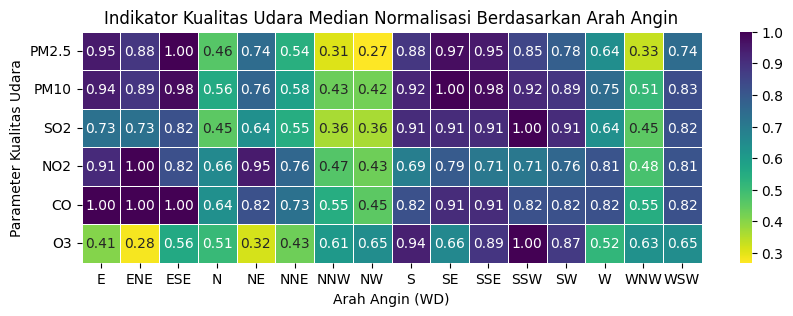

In [123]:
# Daftar polutan yang akan dianalisis
polutan = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Menghitung nilai median untuk setiap polutan berdasarkan arah angin
median_berdasarkan_arah_angin = combined_data.groupby('wd')[polutan].median()

# Menormalisasi data berdasarkan nilai maksimum di setiap kolom
data_median_normalisasi = median_berdasarkan_arah_angin / median_berdasarkan_arah_angin.max()

# Membuat heatmap dari data yang dinormalisasi dan ditranspos
plt.figure(figsize=(10, 3))
sns.heatmap(data_median_normalisasi.T, cmap="viridis_r", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Indikator Kualitas Udara Median Normalisasi Berdasarkan Arah Angin")
plt.xlabel("Arah Angin (WD)")
plt.ylabel("Parameter Kualitas Udara")
plt.show()

Heatmap yang menampilkan nilai median dari berbagai parameter kualitas udara lintas berbagai arah angin menunjukkan beberapa poin sebagai berikut:

Untuk arah angin yang berasal dari timur (E, ENE, ESE), tenggara (S, SE, SSE), dan barat daya (SSW, SW, W), tingkat PM2.5, PM10, SO2, NO2, dan CO umumnya lebih tinggi. Sebaliknya, polutan ini lebih rendah ketika angin datang dari barat laut (NW, NNW) dan barat laut-barat (WNW). Pola ini dapat mengisyaratkan pengaruh arah angin tertentu terhadap sumber dan penyebaran polutan ini.

Mengenai tingkat O3, secara mencolok meningkat dengan angin dari arah selatan-tenggara (SSE, SSW, SW). Ini bisa mencerminkan sumber polusi yang berbeda atau reaksi kimia atmosfer.

Pada intinya, heatmap ini menunjukkan perspektif tentang bagaimana arah angin berkorelasi dengan berbagai polutan lingkungan. Informas ini berharga untuk memecahkan tren udara lokal dan dapat membantu dalam mengidentifikasi sumber polusi berdasarkan pola angin yang dominan.

### **3.4 Do air quality measurements exhibit any periodic variations or trends over different seasons?**

In [124]:
combined_data.columns

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'wd', 'WSPM', 'station', 'datetime', 'Air Quality'],
      dtype='object')

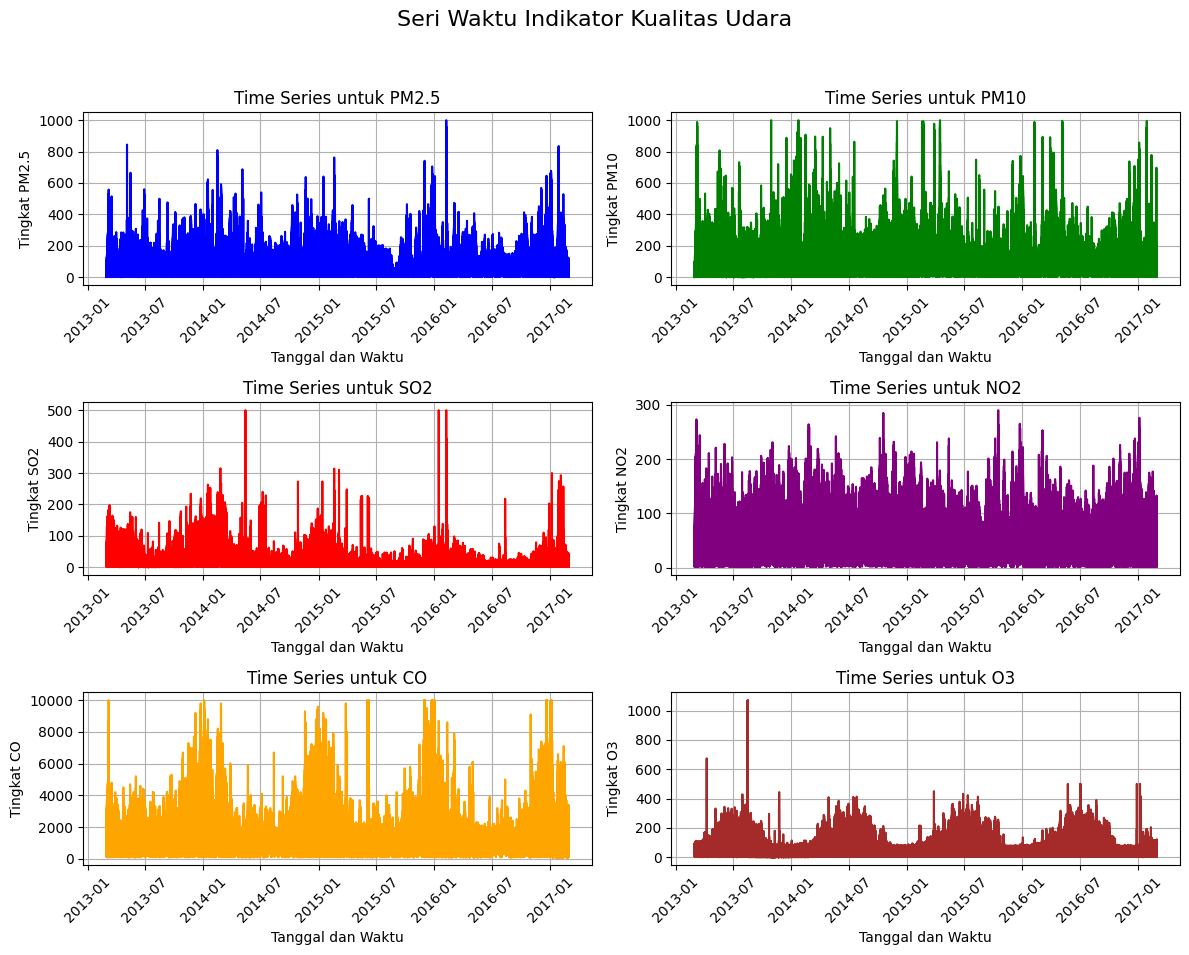

In [125]:
# Mendefinisikan daftar warna untuk plot
warna = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# Menyiapkan grid plot dengan 3 baris dan 2 kolom
fig, sumbu_plot = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.suptitle('Seri Waktu Indikator Kualitas Udara', fontsize=16)

# Mengiterasi parameter untuk membuat subplot individu
for indeks, pol in enumerate(polutan):
    baris_grid = indeks // 2  # Menentukan baris subplot berdasarkan indeks
    kolom_grid = indeks % 2   # Menentukan kolom subplot berdasarkan indeks
    warna_indeks = warna[indeks]  # Memilih warna untuk plot saat ini

    # Membuat plot seri waktu untuk setiap parameter kualitas udara dengan warna yang dipilih
    sumbu_plot[baris_grid, kolom_grid].plot(combined_data['datetime'], combined_data[pol], linestyle='-', color=warna_indeks)
    sumbu_plot[baris_grid, kolom_grid].set_title(f'Time Series untuk {pol}')
    sumbu_plot[baris_grid, kolom_grid].set_xlabel('Tanggal dan Waktu')
    sumbu_plot[baris_grid, kolom_grid].set_ylabel(f'Tingkat {pol}')
    sumbu_plot[baris_grid, kolom_grid].grid(visible=True)
    sumbu_plot[baris_grid, kolom_grid].tick_params(axis='x', rotation=45)

# Menyesuaikan tata letak untuk mencegah tumpang tindih
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Menampilkan semua subplot
plt.show()

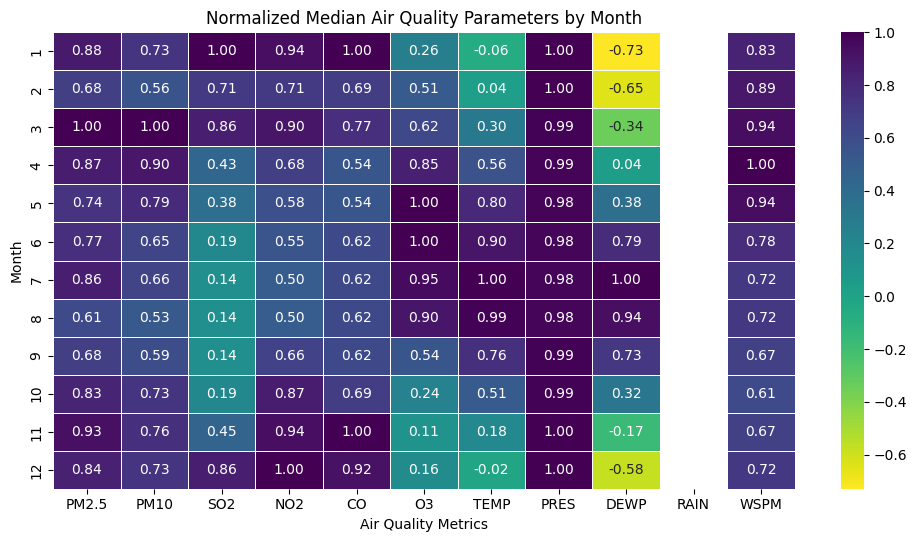

In [126]:
# Calculate median values for each air quality metric grouped by month
monthly_median = combined_data.groupby(combined_data['datetime'].dt.month).median(numeric_only=True)

# Normalize the median values by scaling them relative to their maximum values
scaled_monthly_median = monthly_median / monthly_median.max()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(scaled_monthly_median, cmap="viridis_r", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Normalized Median Air Quality Parameters by Month")
plt.xlabel("Air Quality Metrics")
plt.ylabel("Month")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Data time series tentang parameter kualitas udara mengungkapkan beberapa tren:

- Tingkat PM2.5, PM10, SO2, dan CO biasanya meningkat selama musim dingin (dari bulan November hingga Februari), menunjukkan bahwa kualitas udara memburuk, dengan polusi dan gas yang lebih tinggi di musim yang lebih dingin.

- Konsentrasi O3 biasanya mencapai puncaknya selama musim panas (sekitar Juni hingga Agustus), mencerminkan pola musiman dalam tingkat ozon.

- Fluktuasi suhu yang datang dengan perubahan musim diantisipasi dan memainkan peran dalam tren siklik tingkat polutan udara.

- Sepanjang sebagian besar tahun, presipitasi tampaknya memiliki efek yang dapat diabaikan terhadap kualitas udara secara keseluruhan.

- Tidak ada tren musiman yang jelas terlihat dalam metrik kecepatan angin.

- Konsentrasi polutan seperti PM2.5, PM10, SO2, NO2, dan CO berubah sepanjang tahun, berpotensi karena pergeseran cuaca musiman, tingkat emisi yang bervariasi, dan pola aktivitas manusia yang berbeda.

- Seiring suhu mulai naik, polutan seperti PM2.5 dan PM10 umumnya diamati menurun.

### **3.4 Analyzing variation in air quality across monitoring locations**

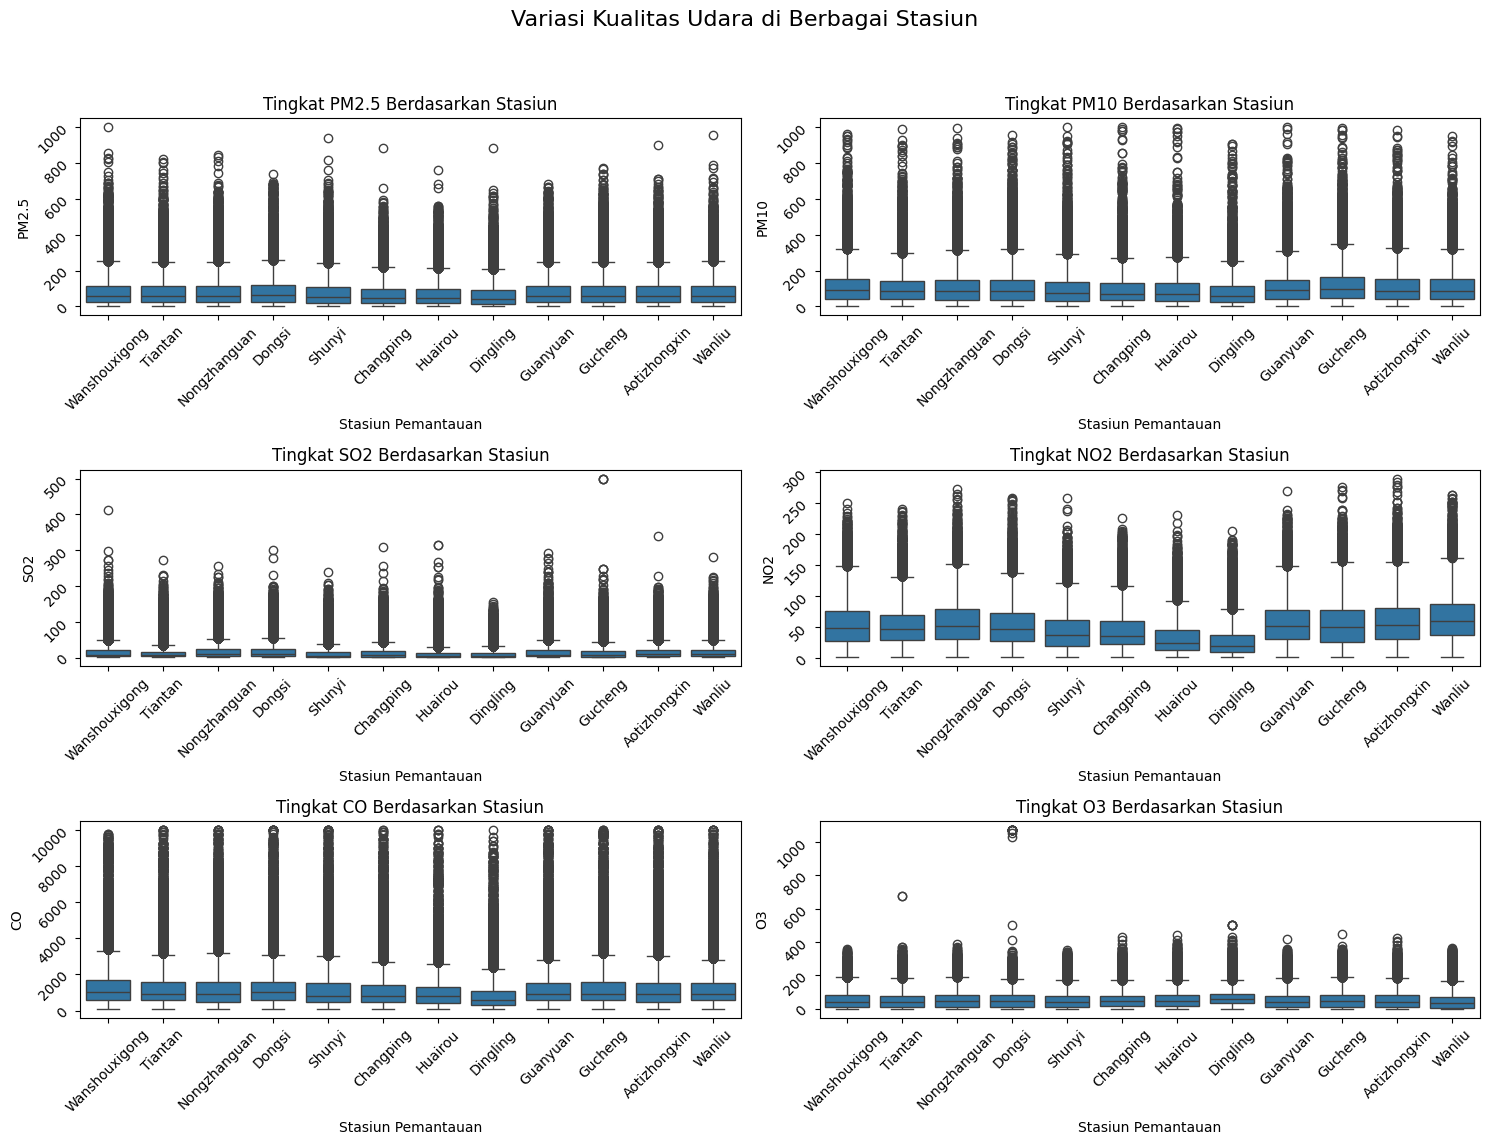

In [127]:
# Menyiapkan grid plot 3x2 dengan ruang vertikal ekstra
figur, sumbu_plot = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
figur.suptitle('Variasi Kualitas Udara di Berbagai Stasiun', fontsize=16)

# Menghasilkan boxplot untuk setiap parameter kualitas udara
for indeks, pol in enumerate(polutan):
    baris_grid = indeks // 2
    kolom_grid = indeks % 2

    # Memplot distribusi sebagai boxplot berdasarkan stasiun
    sns.boxplot(data=combined_data, x='station', y=pol, ax=sumbu_plot[baris_grid, kolom_grid])
    sumbu_plot[baris_grid, kolom_grid].set_title(f'Tingkat {pol} Berdasarkan Stasiun')
    sumbu_plot[baris_grid, kolom_grid].set_xlabel('Stasiun Pemantauan')
    sumbu_plot[baris_grid, kolom_grid].set_ylabel(pol)

for subplot in sumbu_plot.flatten():
    subplot.tick_params(labelrotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

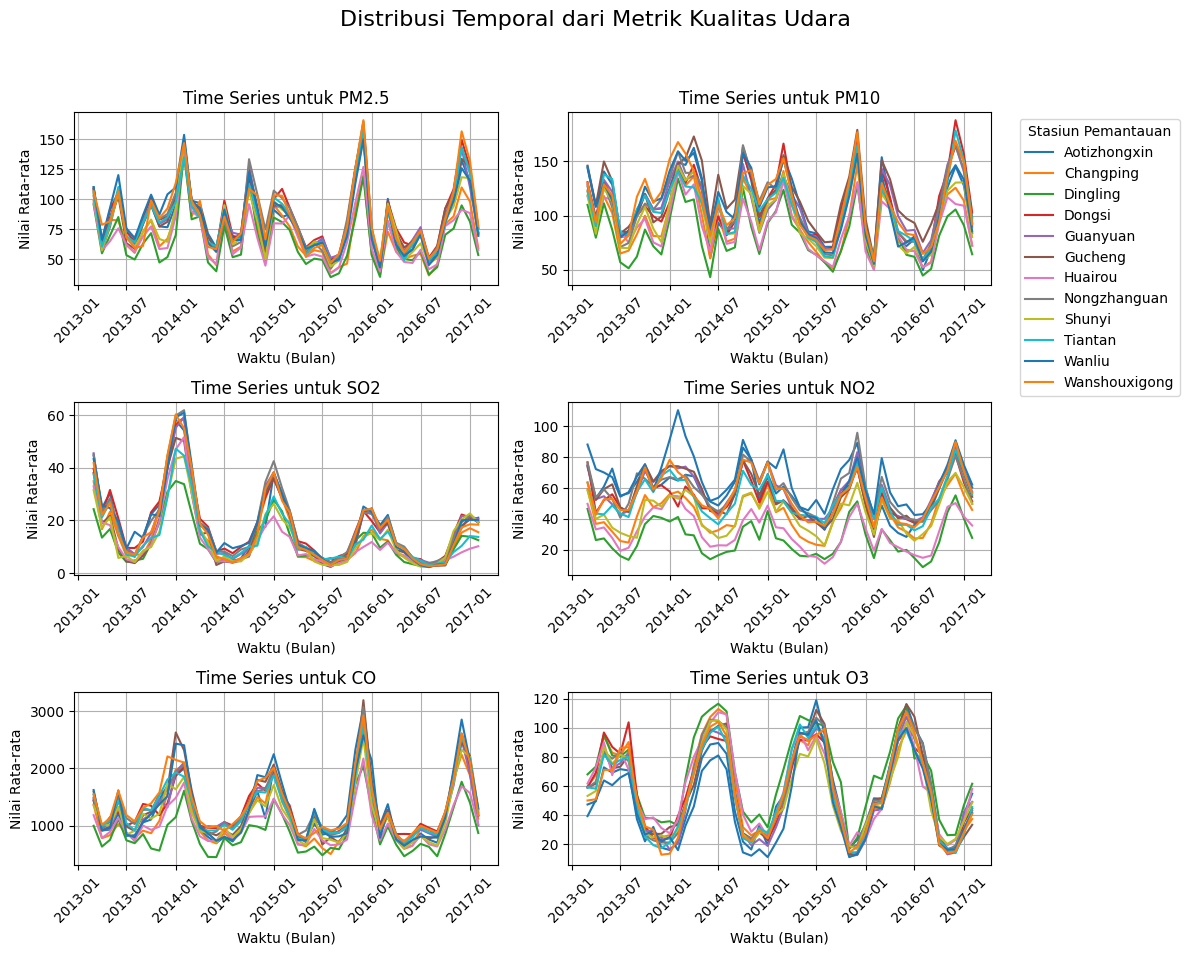

In [130]:
# Mengubah kolom 'datetime' menjadi format datetime
combined_data['datetime'] = pd.to_datetime(combined_data['datetime'])

# Menyiapkan grid 3x2 untuk plot seri waktu
fig, sumbu = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.suptitle('Distribusi Temporal dari Metrik Kualitas Udara', fontsize=16)

legend_handle = []

# Memplot nilai rata-rata parameter per bulan untuk setiap stasiun
for indeks, pol in enumerate(polutan):
    baris = indeks // 2
    kolom = indeks % 2

    # Mengelompokkan dan memplot data berdasarkan bulan dan stasiun
    data_terkelompok = combined_data.groupby([combined_data['datetime'].dt.to_period("M"), 'station'])[pol].mean().unstack()
    for stasiun, nilai in data_terkelompok.items():
        garis, = sumbu[baris, kolom].plot(data_terkelompok.index.to_timestamp(), nilai, label=stasiun)
        # Menyimpan set pertama handle legenda
        if baris == 0 and kolom == 0:
            legend_handle.append(garis)

    sumbu[baris, kolom].set_title(f'Time Series untuk {pol}')
    sumbu[baris, kolom].set_xlabel('Waktu (Bulan)')
    sumbu[baris, kolom].set_ylabel('Nilai Rata-rata')
    sumbu[baris, kolom].grid(True)
    sumbu[baris, kolom].tick_params(axis='x', rotation=45)

    if baris == 0 and kolom == 1:
        sumbu[baris, kolom].legend(title='Stasiun Pemantauan', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Analisis metrik kualitas udara di berbagai stasiun pemantauan memberikan berbagai insigh, diantranya:

- Stasiun di Shunyi dan Wanliu melaporkan tingkat PM2.5 dan PM10 yang tinggi, mengimplikasikan bahwa kualitas udara mungkin secara signifikan lebih buruk di daerah ini karena konsentrasi partikel udara yang lebih tinggi.

- Konsentrasi SO2 secara relatif rendah di semua lokasi yang diukur, menunjukkan bahwa polusi terkait SO2 bukanlah masalah utama di wilayah ini.

- Konsentrasi NO2 yang lebih tinggi secara mencolok diamati di stasiun Aotizhongxin, Wanliu, dan Wanshouxigong.

- Lokasi Tiantan dan Wanshouxigong mencatat tingkat CO yang lebih tinggi.

- Stasiun seperti Dingling dan Huairou ditandai dengan tingkat O3 yang meningkat.